In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
data=pd.read_csv("test.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
data.shape

(418, 12)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [54]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
data=data.drop(columns="Cabin", axis=1)

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


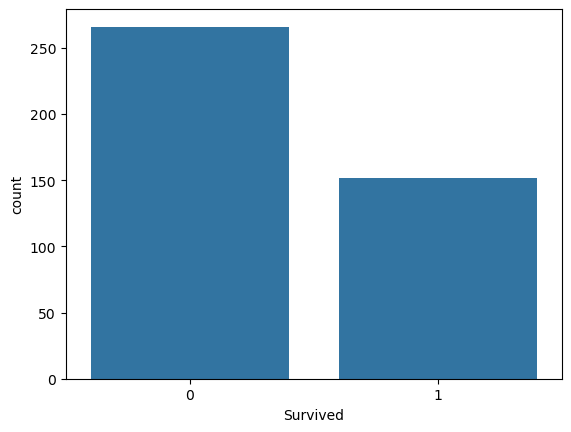

In [16]:
sns.countplot(x='Survived',data=data)
plt.show()

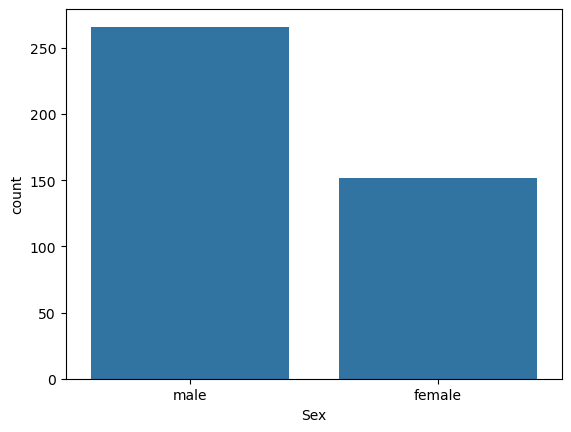

In [17]:
sns.countplot(x='Sex',data=data)
plt.show()

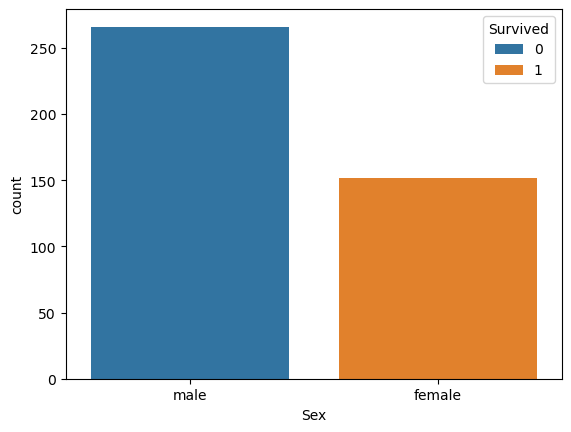

In [18]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.show()

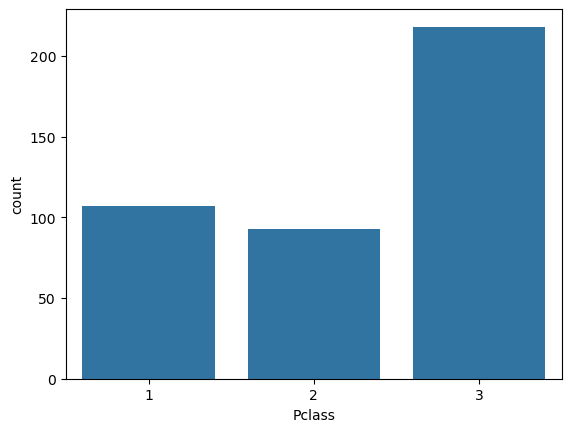

In [19]:
sns.countplot(x='Pclass',data=data)
plt.show()

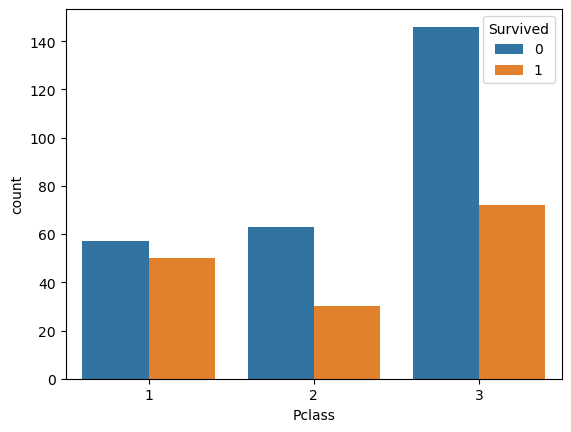

In [20]:
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_48776\585942754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


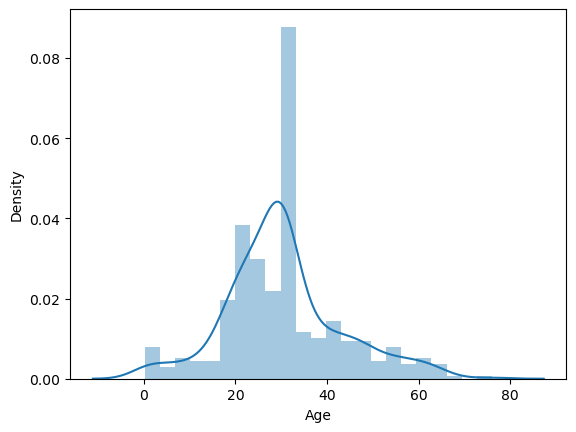

In [90]:
sns.distplot(data['Age'])
plt.show()

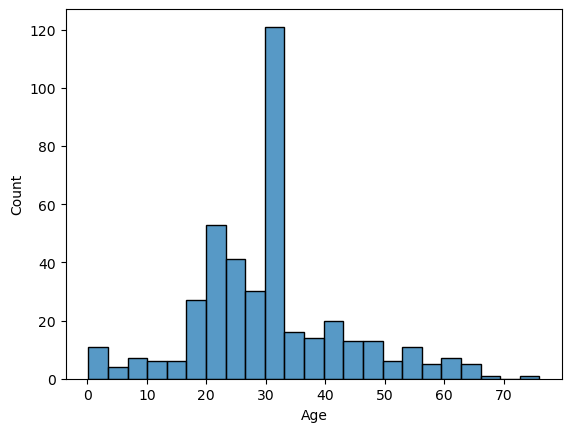

In [91]:
sns.histplot(data['Age'])
plt.show()

In [22]:
data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [23]:
data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [70]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [71]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


In [103]:
X=data.drop(columns=["PassengerId","Name","Survived","Ticket"],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [104]:
Y=data['Survived']
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [106]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (334, 7) (84, 7)


In [107]:
model=LogisticRegression()

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.1+ KB


In [108]:
model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
X_train_prediction = model.predict(X_train)

In [110]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [113]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  1.0


In [114]:
X_test_prediction = model.predict(X_test)

In [115]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [116]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy_score_of_test data : ', test_data_accuracy)

Accuracy_score_of_test data :  1.0
